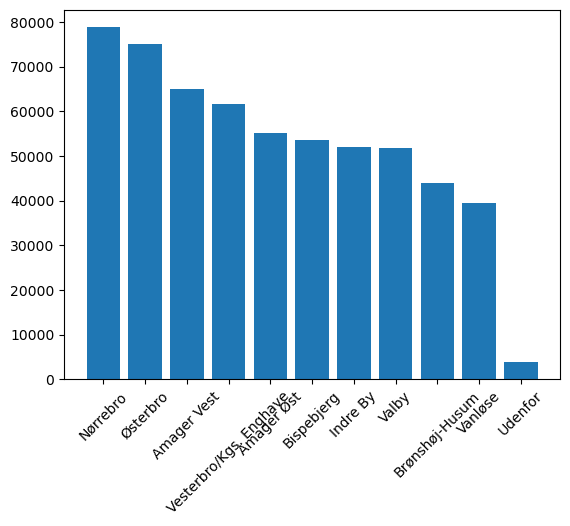

59859.0
Norge
236
Sverige
267
Finland
72
Island
33
Grønland
0
Nordiske beboere over 65 år:  608.0
[62221, 62583, 63050, 63572, 64503, 65856, 66148, 66295, 66673, 66877, 67020, 67550, 67516, 67671, 67351, 67330, 67964, 68769, 69951, 70938, 72400, 73388, 74521, 75113] [47854, 47589, 47538, 47633, 47734, 48275, 49109, 49520, 50312, 50756, 51039, 51045, 50869, 50643, 50303, 50964, 51466, 53351, 55315, 57150, 58411, 59211, 60328, 61623]


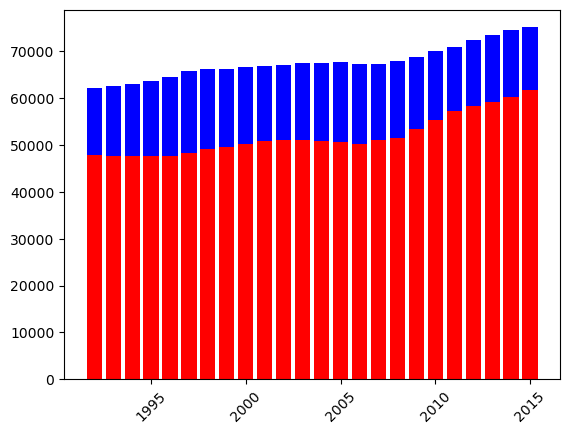

"\n\n\nwith open(filename, 'r') as file:\n    reader = csv.reader(file)\n    header_row = next(reader)\n    print(header_row)\n\n"

In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt

filename = './befkbhalderstatkode.csv'

# 1. Open the file './data/befkbhalderstatkode.csv'



# 2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`
bef_stats_df = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)
dd = bef_stats_df


# 3. Using this data:
"""
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
    
    Find out how many people lived in each of the 11 areas in 2015
"""
# Find out how many people lived in each of the 11 areas in 2015
# ['AAR', 'BYDEL', 'ALDER', 'STATKODE', 'PERSONER']

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}


mask = (dd[:,0] == 2015)

def number_of_people_per_neighbourhood(n, mask):
    all_people_in_given_n = dd[mask & (dd[:,1] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum() # index 4 is no of 'PERSONER'
    return sum_of_people

results = np.empty((11, 2), dtype=object)
dict_result = {}

for i in neighb:
    res = number_of_people_per_neighbourhood(i,mask)
    dict_result[neighb[i]]=res
    #print(neighb[i] + ": " + str(res))


array_res = np.array(list(dict_result.items()), dtype=object)


# 4. Make a bar plot to show the size of each city area from the smallest to the largest in 2015

dict_res_sorted = dict(sorted(dict_result.items(), key = lambda item: item[1], reverse=True))
#print(dict_res_sorted)

plt.bar(dict_res_sorted.keys(), dict_res_sorted.values())
plt.xticks(rotation=45)
plt.show()

# 5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015

mask = (dd[:,0] == 2015) & (dd[:,2] >= 65)


res_above_65 = np.array([number_of_people_per_neighbourhood(n,mask) for n in neighb.keys()])
print(sum(res_above_65))

# 6. How many of those were from the other nordic countries (not dk). Hint: see notebook: "04 Numpy"

nordic_countries = ["Norge","Sverige","Finland","Island","Grønland"] 
nordic_not_dk_country_codes = {5110:"Norge",5120:"Sverige",5104:"Finland",5106:"Island",5101:"Grønland"}

data = dd

old_nords = 0 
for x,y in nordic_not_dk_country_codes.items(): 
    if y in nordic_countries: 
        
        print(y) 
        mask = (data[:,0] == 2015) & (data[:,2] > 65) & (data[:,3] == x) 
        country_sum = (data[mask][0:,4].sum()) 
        print(country_sum)
        old_nords += country_sum
print("Nordiske beboere over 65 år: ",old_nords) 


# 7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

neighb1 = { 2: 'Østerbro', 4: 'Vesterbro/Kgs. Enghave'}
mask_1992_2015_ostrebro = (dd[:,0] >= 1992) & (dd[:,0] <= 2015) 

osterbro = []
vesterbro = []



for year in range(1992, 2016):
   mask_osterbro = (data[:, 0] == year) & (data[:, 1] == 2)
   osterbro_count = np.sum(data[mask_osterbro, 4])
   osterbro.append(osterbro_count)
   plt.bar([year], [osterbro_count], color='blue')

   mask_vesterbro = (data[:, 0] == year) & (data[:, 1] == 4)
   vesterbro_count = np.sum(data[mask_vesterbro, 4])
   vesterbro.append(vesterbro_count)
   plt.bar([year], [vesterbro_count], color='red')

# Print the two arrays
print(osterbro, vesterbro)



plt.xticks(rotation=45)
plt.show()

"""


with open(filename, 'r') as file:
    reader = csv.reader(file)
    header_row = next(reader)
    print(header_row)

"""



